In [1]:
# import required packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Load Dataset

In [2]:
cc_df = pd.read_csv("C:/KSKarthik/PDC-2/04.Capstone_Project/Data/creditcard.csv")
cc_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Exploratory Data Analysis (EDA)

In [3]:
# Dataset Shape (No of Rows and Columns)
rows, cols = cc_df.shape
print("Rows: {}".format(rows))
print("Columns: {}".format(cols))

Rows: 284807
Columns: 31


In [4]:
# Check How many missing/null Predictors in the dataset
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
# Describe about Dataset
cc_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
cc_df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


As for Amount feature, mean is 88.350 and max is 25691.160.  In this case, most of the transacations are <= 100.00 and a very few transacations are close to maximum amount. 

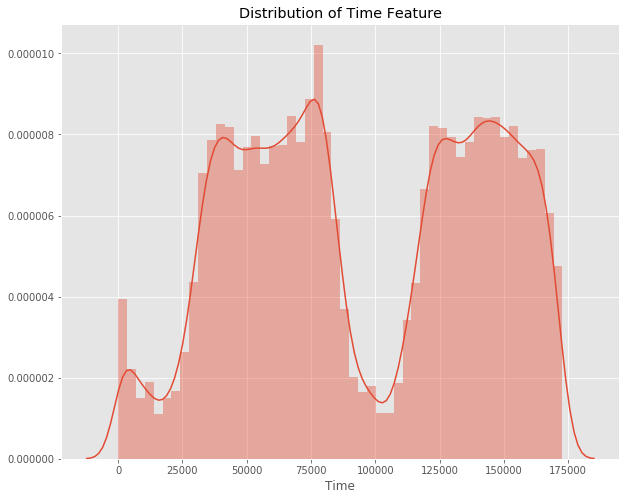

In [7]:
#Visualisation of Time Feature
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(cc_df.Time)

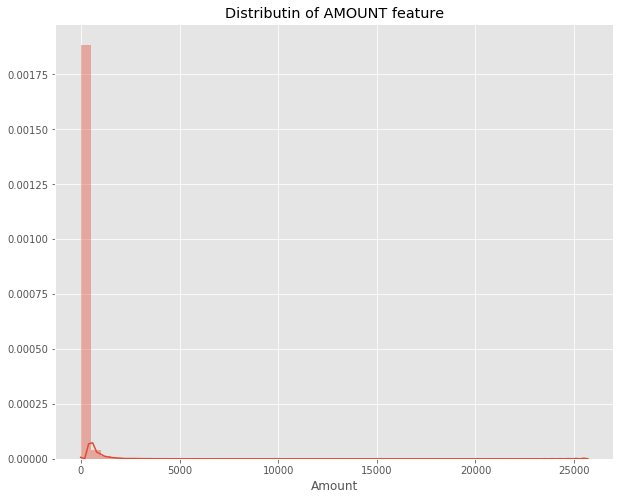

In [8]:
# Visualisation of Amount Feature
plt.figure(figsize=(10,8))
plt.title("Distributin of AMOUNT feature")
sns.distplot(cc_df.Amount)

In [9]:
# Normal and Fraud Transactions in percentile 
counts = cc_df.Class.value_counts()
Normal_Trans = counts[0]
Fraud_Trans = counts[1]
Total_Trans = Normal_Trans + Fraud_Trans
normal_trans_percentile = (Normal_Trans/Total_Trans)*100
fraud_trans_percentile =(Fraud_Trans/Total_Trans)*100
print("{:.3f}% of Normal Transacations".format(normal_trans_percentile))
print("{:.3f}% of Fraud Transacations".format(fraud_trans_percentile))

99.827% of Normal Transacations
0.173% of Fraud Transacations


Since there are 99.827% of Normal transactions and 0.173% of Fraud Transactions, the Dataset is highly IMBALANCED. 

Text(0, 0.5, 'Transation Count')

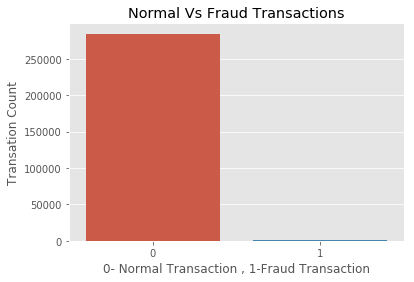

In [10]:
# Visualisation of Class Counts
sns.barplot(x=counts.index, y=counts)
plt.title("Normal Vs Fraud Transactions")
plt.xlabel("0- Normal Transaction , 1-Fraud Transaction")
plt.ylabel("Transation Count")

In [11]:
# Find Correlation between all features in the Dataset
corr = cc_df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,...,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.697e-17,-1.424e-15,1.755e-17,6.391e-17,2.398e-16,1.992e-15,-9.491e-17,2.170e-16,...,-1.755e-16,7.477e-17,9.809e-16,7.354e-17,-9.805e-16,-8.622e-17,3.208e-17,9.821e-16,-2.277e-01,-1.013e-01
V2,-0.011,4.697e-17,1.000e+00,2.512e-16,-1.126e-16,-2.040e-16,5.025e-16,3.966e-16,-4.414e-17,-5.729e-17,...,8.444e-17,2.501e-16,1.060e-16,-8.142e-18,-4.262e-17,2.602e-16,-4.478e-16,-3.676e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.424e-15,2.512e-16,1.000e+00,-3.417e-16,-1.437e-15,1.432e-15,2.169e-15,3.433e-16,-4.234e-16,...,-2.972e-17,4.648e-16,2.115e-17,-9.352e-17,4.771e-16,6.522e-16,6.240e-16,7.727e-16,-2.109e-01,-1.930e-01
V4,-0.105,1.755e-17,-1.126e-16,-3.417e-16,1.000e+00,-1.941e-15,-2.713e-16,1.556e-16,5.196e-16,3.860e-16,...,-9.977e-17,2.100e-16,6.003e-17,2.230e-16,5.395e-16,-6.180e-16,-6.403e-17,-5.864e-17,9.873e-02,1.334e-01
V5,0.173,6.391e-17,-2.040e-16,-1.437e-15,-1.941e-15,1.000e+00,7.926e-16,-4.210e-16,7.589e-16,4.205e-16,...,-1.369e-16,5.060e-16,1.638e-16,-9.286e-16,5.625e-16,9.145e-16,4.466e-16,-3.299e-16,-3.864e-01,-9.497e-02
V6,-0.063,2.398e-16,5.025e-16,1.432e-15,-2.713e-16,7.926e-16,1.000e+00,1.429e-16,-1.707e-16,1.114e-16,...,-1.576e-16,-3.363e-16,-7.232e-17,-1.262e-15,1.082e-15,-2.378e-16,-2.624e-16,4.813e-16,2.160e-01,-4.364e-02
V7,0.085,1.992e-15,3.966e-16,2.169e-15,1.556e-16,-4.210e-16,1.429e-16,1.000e+00,-8.692e-17,7.933e-16,...,1.939e-16,-1.058e-15,2.328e-16,-2.590e-17,1.174e-15,-7.335e-16,-5.887e-16,-6.837e-17,3.973e-01,-1.873e-01
V8,-0.037,-9.491e-17,-4.414e-17,3.433e-16,5.196e-16,7.589e-16,-1.707e-16,-8.692e-17,1.000e+00,2.901e-16,...,-2.412e-16,5.476e-16,3.897e-16,-1.803e-16,-1.391e-16,-1.210e-16,1.734e-16,-4.484e-16,-1.031e-01,1.988e-02
V9,-0.009,2.170e-16,-5.729e-17,-4.234e-16,3.860e-16,4.205e-16,1.114e-16,7.933e-16,2.901e-16,1.000e+00,...,4.578e-17,2.872e-17,5.929e-16,-2.346e-16,1.100e-15,-1.389e-15,-2.287e-16,9.147e-16,-4.425e-02,-9.773e-02


Text(0.5, 1.0, 'Correlation between features')

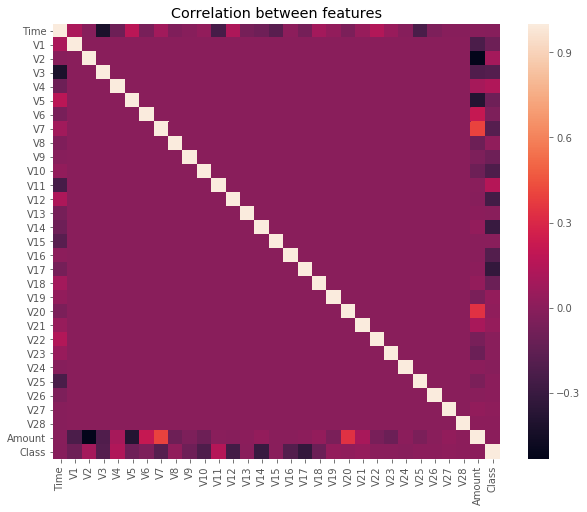

In [12]:
# Visualisation of correlation between features using Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data=corr)
plt.title("Correlation between features")

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64


Text(0.5, 1.0, 'Skewness of Dataset')

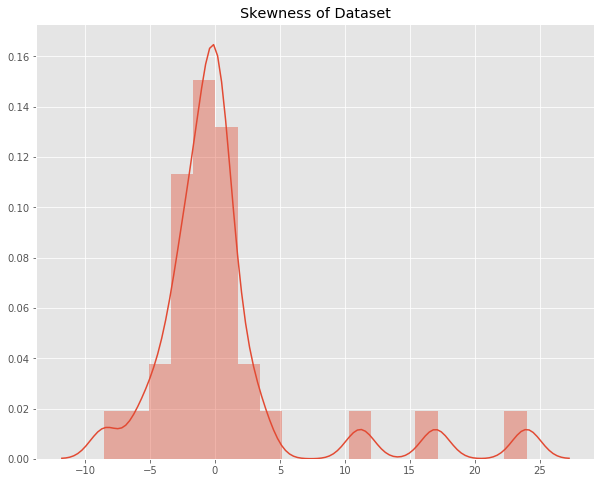

In [13]:
# Dataset Skewness 
skewness = cc_df.skew()
print(skewness)
plt.figure(figsize=(10,8))
sns.distplot(skewness,hist=True)
plt.title("Skewness of Dataset")


The dataset is skewed right side. 

### Scaling AMOUNT and TIME feature

#### Since features starting from V1 thru V28 are already principal components but Amount and Time are not normalised, we need to normalise both amount and time features.

In [14]:
# Consider Non-anonymized (Amount and Time) features for normalisation. 
from sklearn.preprocessing import StandardScaler

scaleTime = StandardScaler()
scaled_Time = scaleTime.fit_transform(cc_df[['Time']])
list_scaledTime = [stime for sublist in scaled_Time.tolist() for stime in sublist]
series_scaledTime = pd.Series(list_scaledTime)

In [15]:
scaleAmount = StandardScaler()
scaled_Amount = scaleAmount.fit_transform(cc_df[['Amount']])
list_scaledAmt = [amt for sublist in scaled_Amount.tolist() for amt in sublist]
series_scaledAmt = pd.Series(list_scaledAmt)

In [16]:
# Concatenating scaled time and amount with original dataframe
scaled_df = pd.concat([cc_df, series_scaledAmt.rename("scaled_amount"), series_scaledTime.rename("scaled_time")], axis=1)
scaled_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
0,0.0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.62,0,0.245,-1.997
1,0.0,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,0.101,-0.340,0.167,0.126,-0.009,0.015,2.69,0,-0.342,-1.997
2,1.0,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.66,0,1.161,-1.997
3,1.0,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.50,0,0.141,-1.997
4,2.0,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.137,0.141,-0.206,0.502,0.219,0.215,69.99,0,-0.073,-1.997


In [17]:
# Dropping old Time and Amount feature
scaled_df = scaled_df.drop(['Time','Amount'], axis=1)

In [18]:
scaled_df.shape

(284807, 31)

### Random Under-Sampling

Split the scaled dataset into Train and Test

In [19]:
mask = np.random.rand(len(scaled_df)) < 0.9
train = scaled_df[mask]
test = scaled_df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256192, 31)
Test Shape: (28615, 31)


In [20]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

### Create a sub-sample dataset with balanced class distribution

In [21]:
# Find how many Fraud Transactions are there in the (Random) Training Data 
no_of_fraud_trans = train['Class'].value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_fraud_trans))

There are 430 fraudulent transactions in the train data.


In [22]:
# Segregate Normal and Fraud Transactions from the Train Data 
normal_trans_df = train[train['Class']==0]
fraud_trans_df = train[train['Class']==1]

In [23]:
# Randomly selecting the same no of Normal Trans (that is, 445) as Fraud Trans from Normal Trans Data
selected_norml_trans_df = normal_trans_df.sample(no_of_fraud_trans)
selected_norml_trans_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
26514,-1.040,0.821,0.718,1.133,0.569,0.664,0.079,0.712,-0.753,-0.184,...,0.236,-0.171,-0.779,0.040,-0.194,0.303,0.065,0,-0.221,-1.249
95231,-0.612,0.485,0.819,-0.878,-0.797,-0.065,1.008,-0.169,-1.775,0.723,...,-1.289,0.124,0.163,-0.414,0.099,-0.325,-0.027,0,0.206,-0.529
67433,-1.989,-1.840,1.593,-1.960,-1.192,-1.171,-0.824,0.426,-2.373,0.334,...,0.233,0.107,0.364,0.463,-0.153,-0.096,-0.184,0,0.350,-0.822
230827,0.879,-2.031,-1.021,1.846,-0.889,0.368,0.220,0.126,1.161,-0.040,...,-1.566,-0.053,-0.504,-0.579,-1.150,-0.059,0.044,0,1.799,1.325
57721,1.132,0.262,0.914,2.335,-0.421,0.177,-0.431,0.244,-0.466,0.883,...,0.324,-0.098,-0.025,0.398,0.104,-0.002,0.014,0,-0.311,-0.922


In [24]:
# Reset Index of both selected_norml_trans_df and fraud_trans_df
selected_norml_trans_df.reset_index(drop=True, inplace=True)
fraud_trans_df.reset_index(drop=True, inplace=True)

In [25]:
# Concatenate both selected_norml_trans_df and fraud_trans_df
subsample_df = pd.concat([selected_norml_trans_df, fraud_trans_df])
subsample_df.shape

(860, 31)

### Shuffle the subsample dataset

In [26]:
#shuffle the subsample df/dataset
subsample_df = subsample_df.sample(frac=1).reset_index(drop=True)

Text(0, 0.5, 'Transaction Count')

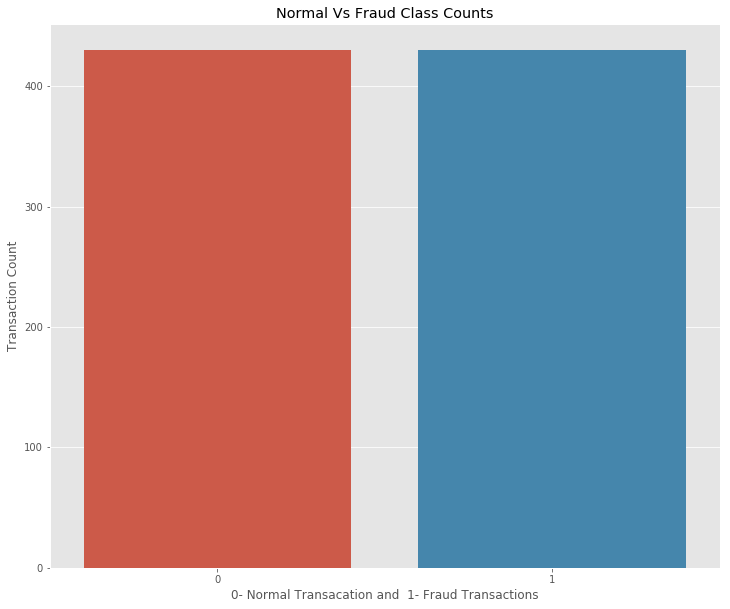

In [27]:
# Visualise Class Counts (Normal and Fraud Transactions)
plt.figure(figsize=(12,10))
subsample_class_counts= subsample_df['Class'].value_counts()
sns.barplot(x=subsample_class_counts.index, y=subsample_class_counts)
plt.title("Normal Vs Fraud Class Counts")
plt.xlabel('0- Normal Transacation and  1- Fraud Transactions')
plt.ylabel("Transaction Count")

In [28]:
#taking a look at correlations once more in the subsample dataset
corr = subsample_df.corr()
corr = corr[['Class']]
corr

,Class
V1,-4.308e-01
V2,5.104e-01
V3,-5.626e-01
V4,7.119e-01
V5,-3.851e-01
V6,-3.737e-01
V7,-4.754e-01
V8,4.433e-02
V9,-5.649e-01
V10,-6.257e-01


In [29]:
# Negative Correlatoin less than -0.5
corr[corr['Class'] < -0.5]

,Class
V3,-0.563
V9,-0.565
V10,-0.626
V12,-0.682
V14,-0.745
V16,-0.590
V17,-0.558


In [30]:
# Positive Correlation greater than 0.5
corr[corr['Class'] > 0.5]

,Class
V2,0.510
V4,0.712
V11,0.683
Class,1.000


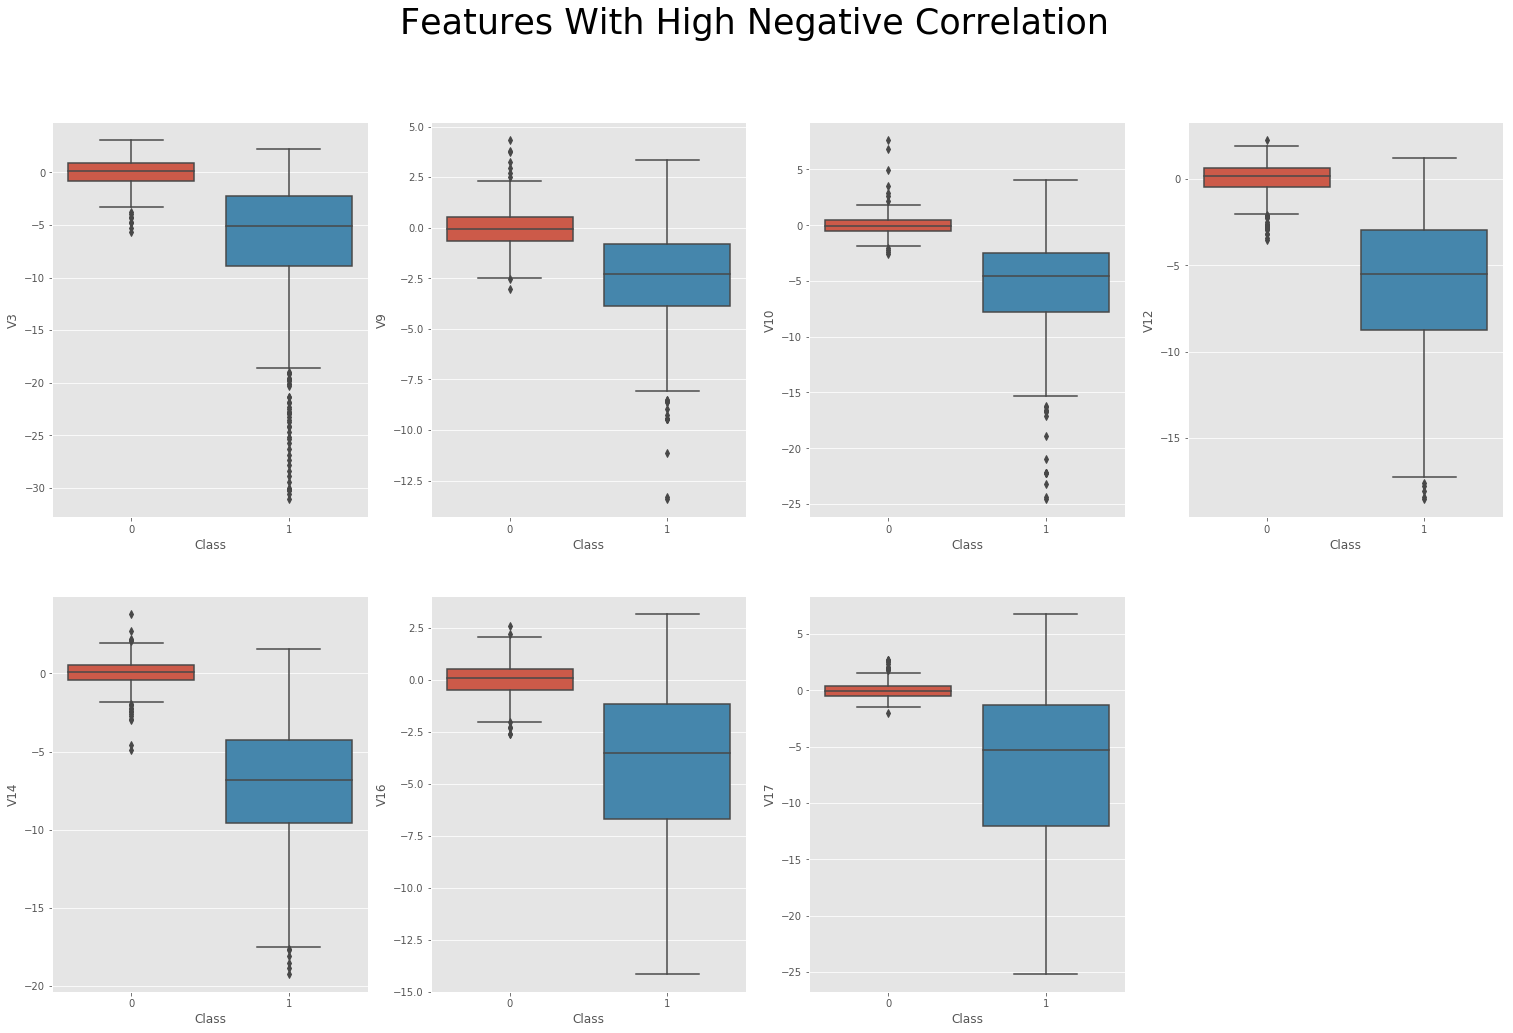

In [31]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample_df, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample_df, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample_df, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample_df, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample_df, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample_df, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample_df, ax=axes[1,2])
f.delaxes(axes[1,3])

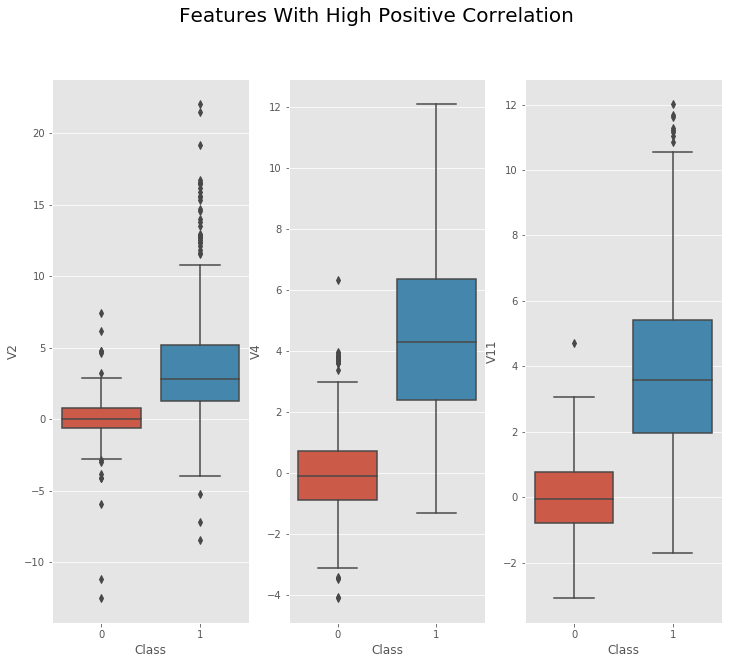

In [32]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,10))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V2", data=subsample_df, ax=axes[0])
sns.boxplot(x="Class", y="V4", data=subsample_df, ax=axes[1])
sns.boxplot(x="Class", y="V11", data=subsample_df, ax=axes[2])



### Remove Extreme Outliners

In [33]:
# Remove Extreme outliers
Q1_feature_val = subsample_df.quantile(0.25)
Q3_feature_val= subsample_df.quantile(0.75)
IQR = (Q3_feature_val - Q1_feature_val)
wo_outliner_df = subsample_df[~((subsample_df < (Q1_feature_val - 2.5 * IQR)) |(subsample_df > (Q3_feature_val + 2.5 * IQR))).any(axis=1)]

In [34]:
len_before = len(subsample_df)
len_after = len(wo_outliner_df)
len_difference = len_before - len_after
len_difference
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 860 transactions by 252 transactions to 608 transactions.


### Split Final Dataset into Train and Test

In [35]:
# Train and Test Split
from sklearn.model_selection import train_test_split
X = wo_outliner_df.drop('Class', axis=1)
y = wo_outliner_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
print(X_train.shape)
print(X_test.shape)

(486, 30)
(122, 30)


### Classification Algorithms : Spot-Check

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [38]:
##Spot-Checking Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))
models.append(('GNB', GaussianNB()))

In [39]:
#testing models
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')                
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.980806 (0.019640)
SVM: 0.968116 (0.030068)
GNB: 0.961685 (0.020649)


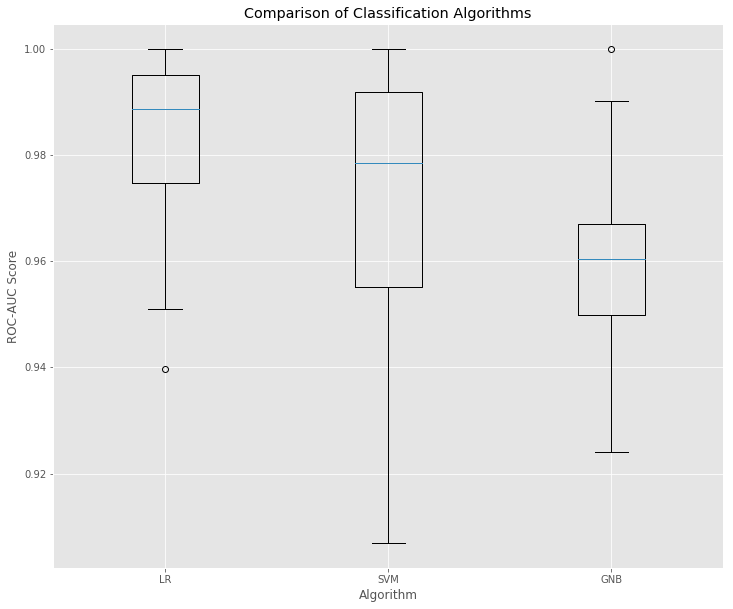

In [40]:
#Compare Algorithms
fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [41]:
# Make predictions on Test data
for name, model in models:
    model.fit(X_train,y_train)
    print("Predictions with " + name +":")    
    predictions = model.predict(X_test)
    print("\n accuracy_score:")
    print(accuracy_score(y_test, predictions))
    print("\n Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("\n Classification Report:")
    print(classification_report(y_test, predictions))
    print("--------------------------------------------------------")
    print (model.get_params())
    print("--------------------------------------------------------")


Predictions with LR:

 accuracy_score:
0.9426229508196722

 Confusion Matrix:
[[74  0]
 [ 7 41]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        74
           1       1.00      0.85      0.92        48

   micro avg       0.94      0.94      0.94       122
   macro avg       0.96      0.93      0.94       122
weighted avg       0.95      0.94      0.94       122

--------------------------------------------------------
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
--------------------------------------------------------
Predictions with SVM:

 accuracy_score:
0.9426229508196722

 Confusion Matrix:
[[74  0]
 [ 7 41]]

 Classification Report:
              precision    recall  f1-score   support

 

### Hyperparameters Tuning - Logistic Regression

In [42]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3, 3, 20), "penalty":['l1', 'l2'], "solver":["liblinear"]} # l1 ->lasso l2->ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10,scoring='roc_auc')
logreg_cv= logreg_cv.fit(X_train,y_train)

print("accuracy :",logreg_cv.best_score_)
print('Best Penalty:', logreg_cv.best_estimator_.get_params()['penalty'])
print('Best C:', logreg_cv.best_estimator_.get_params()['C'])



accuracy : 0.9827902761617945
Best Penalty: l2
Best C: 0.00206913808111479


### Predict on Test Data with the best model

In [43]:
logreg_cv.predict(X_test)

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)